# Introduction to Cameras and Underwater Imaging

This notebook serves as a an accompignment to the lecture for the 25324 Aquatic Fieldwork course. The notebook is written in python and relies heavily upon openCV. The purpose is to give you a starting point of how to work with images and show you how easy it is to implement simple computer vision algorithms.

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from IPython.display import display
import cv2
import numpy as np
from matplotlib.patches import Rectangle


## Introcution to images

The code below highlights how piexels are just combinations of 3 independant channel. The first example is a fairly boring color slider. The second one is a bit more interesting, it shows how we don't have to only user RBG channels but can use other independant channels, a popular example of which is LAB! Play around and get a feel for how colors work.

<IPython.core.display.Javascript object>


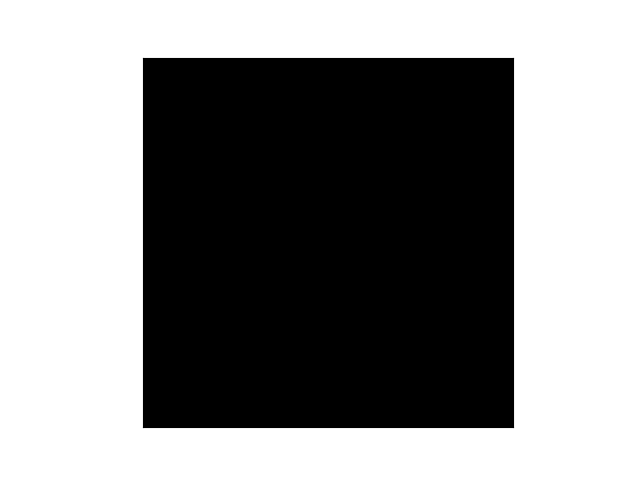

interactive(children=(IntSlider(value=0, description='Red', max=255), IntSlider(value=0, description='Green', …

In [2]:
# Create figure and axis
fig, ax = plt.subplots()

# Create color patch
color_patch = Rectangle((0, 0), 3, 3, color=(0, 0, 0))


# Set initial aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

# Remove ticks from axes
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

def update_color(red=0, green=0, blue=0):
    red = red / 255.0
    green = green / 255.0
    blue = blue / 255.0
    color = (red, green, blue)
    color_patch.set_color(color)
    ax.add_patch(color_patch)
    fig.canvas.draw_idle()

# Create sliders
red_slider = widgets.IntSlider(min=0, max=255, step=1, description='Red', value=0)
green_slider = widgets.IntSlider(min=0, max=255, step=1, description='Green', value=0)
blue_slider = widgets.IntSlider(min=0, max=255, step=1, description='Blue', value=0)

# Create interact widget
interact_widget = widgets.interactive(update_color, red=red_slider, green=green_slider, blue=blue_slider)

# Display interact widget
display(interact_widget)


<IPython.core.display.Javascript object>


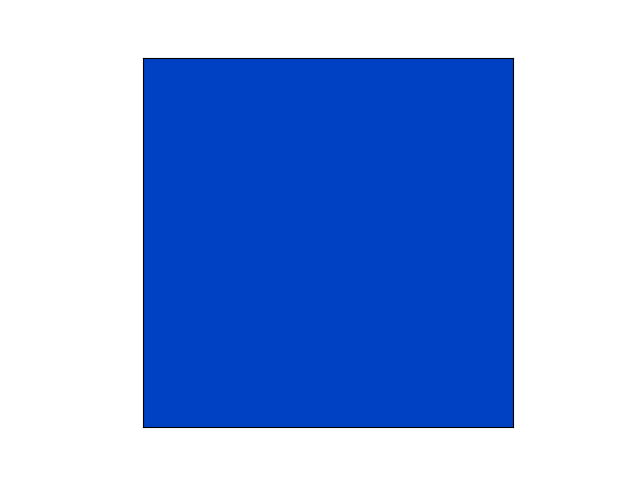

interactive(children=(IntSlider(value=0, description='L', max=255), IntSlider(value=0, description='A', max=25…

In [3]:
# Create figure and axis
fig, ax = plt.subplots()

# Create color patch
color_patch = Rectangle((0, 0), 3, 3, color=(0, 0, 0))


# Set initial aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

# Remove ticks from axes
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

def update_color(l=0, a=0, b=0):
    lab = np.array([l,a,b], dtype=np.uint8)
    color = cv2.cvtColor(np.uint8([[lab]]), cv2.COLOR_LAB2RGB)[0][0]
    color = (color[0]/255,color[1]/255,color[2]/255)
    color_patch.set_color(color)
    ax.add_patch(color_patch)
    fig.canvas.draw_idle()

# Create sliders
light = widgets.IntSlider(min=0, max=255, step=1, description='L', value=0)
a = widgets.IntSlider(min=0, max=255, step=1, description='A', value=0)
b = widgets.IntSlider(min=0, max=255, step=1, description='B', value=0)

# Create interact widget
interact_widget = widgets.interactive(update_color, l = light, a = a, b = b)

# Display interact widget
display(interact_widget)


## Color corrections

In this section we look at the effect of applying some color filters effect! Feel free to replace the image with one of your own

In [4]:
import preprocessing

<IPython.core.display.Javascript object>


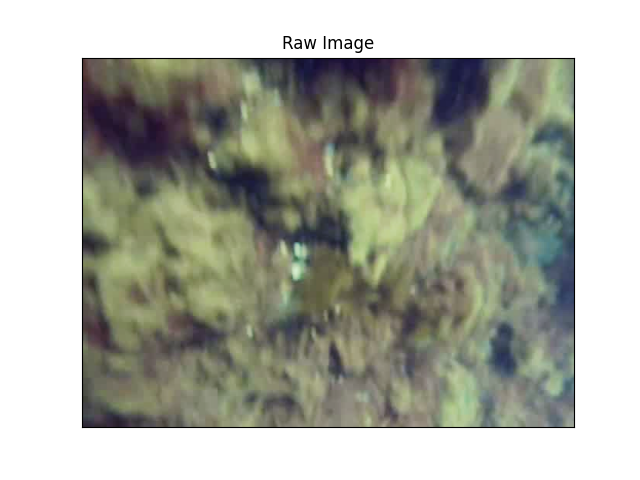

[]

In [5]:

image = cv2.imread("images/seaweed.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image_enchanced = preprocessing.enhance_detail(image)
image_color = preprocessing.fix_color(image)
image_contrast = preprocessing.fix_contrast(image)
image_light = preprocessing.fix_light(image)
fig, ax = plt.subplots()
ax.imshow(image)
ax.set_title("Raw Image")
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])


<IPython.core.display.Javascript object>


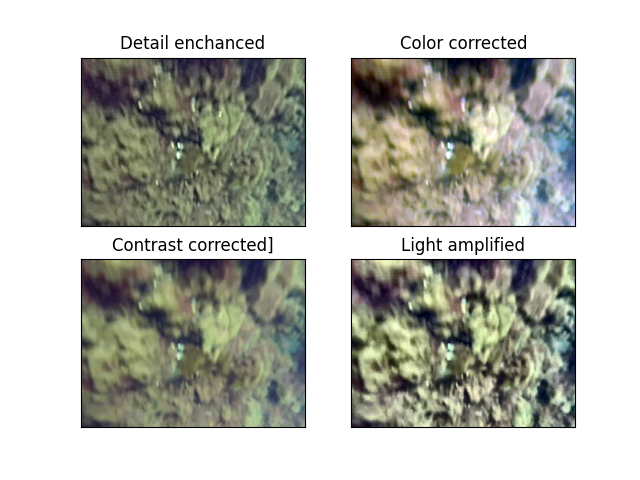

[]

In [6]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(image_enchanced)
axs[0, 0].set_title('Detail enchanced')
axs[0,0].xaxis.set_ticks([])
axs[0,0].yaxis.set_ticks([])
axs[0, 1].imshow(image_color)
axs[0, 1].set_title('Color corrected')
axs[0,1].xaxis.set_ticks([])
axs[0,1].yaxis.set_ticks([])
axs[1, 0].imshow(image_contrast)
axs[1, 0].set_title('Contrast corrected]')
axs[1,0].xaxis.set_ticks([])
axs[1,0].yaxis.set_ticks([])
axs[1, 1].imshow(image_light)
axs[1, 1].set_title('Light amplified')
axs[1,1].xaxis.set_ticks([])
axs[1,1].yaxis.set_ticks([])



## Edge Detection

Try changing the kernel sizes in the below cells and see how they effect the output!
For a detailed explination of edge detection and how it is completed using fast, simple matrix multipliction check out:https://learnopencv.com/edge-detection-using-opencv/ for a more comprehensive view of how edged detection works. Blob detection is also key in many computer vision algorithms, for details on blob detection check out: https://hackthedeveloper.com/blob-detection-opencv-python/

Image credits: Jean Willerman https://unsplash.com/photos/ePvBOHsAA54


In [7]:
sobel_kernel_size = 5 #Default is 5
canny_lower_threshold = 100 # Default is 100
canny_upper_threshold = 200 # Default is 200

<IPython.core.display.Javascript object>


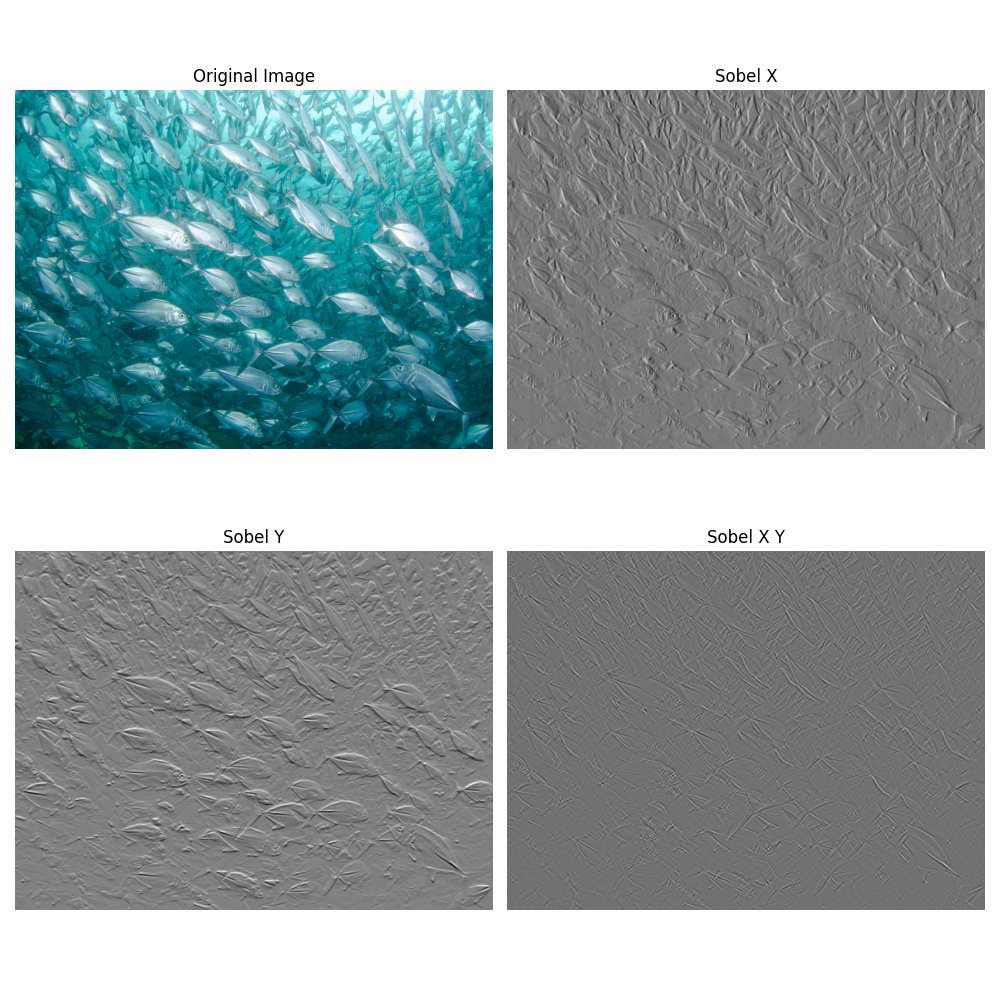

<IPython.core.display.Javascript object>


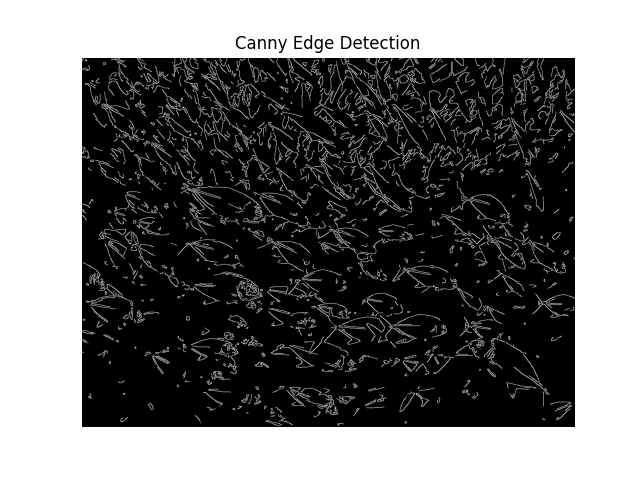

(-0.5, 1073.5, 805.5, -0.5)

In [8]:
# Read the original image
img = cv2.imread('images/fish.jpg')

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=sobel_kernel_size)  # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=sobel_kernel_size)  # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=sobel_kernel_size)  # Combined X and Y Sobel Edge Detection

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=canny_lower_threshold, threshold2=canny_upper_threshold)  # Canny Edge Detection

# Display images using matplotlib
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Original Image
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Sobel X
axes[0, 1].imshow(sobelx, cmap='gray')
axes[0, 1].set_title('Sobel X')
axes[0, 1].axis('off')

# Sobel Y
axes[1, 0].imshow(sobely, cmap='gray')
axes[1, 0].set_title('Sobel Y')
axes[1, 0].axis('off')

# Sobel X and Y
axes[1, 1].imshow(sobelxy, cmap='gray')
axes[1, 1].set_title('Sobel X Y')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Display Canny Edge Detection
fig, ax = plt.subplots()
ax.imshow(edges, cmap = "gray")
ax.set_title('Canny Edge Detection')
ax.axis('off')



## Feature detection

Features dection and descrirprtion is a key and very interesting part of computer vision. This example is heavily based on: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html. Essentially, what we do here is detect blobs, and then describe them uniquely using the SIFT descriptor. To roughly describe the process, we look for blobs and then look at the pixels around these blobs to create a unique (in theory) descriptor of the feature which allows us to look for similar features in another image. There is a lot of very clever and suprisingly simple innovations which mean we can match features that are, scaled, rotated, illuminated and in a different perspective. 

In the example below, the two pictures are taken 3 years apart and yet some good matches can still be found between the door and the image


<IPython.core.display.Javascript object>


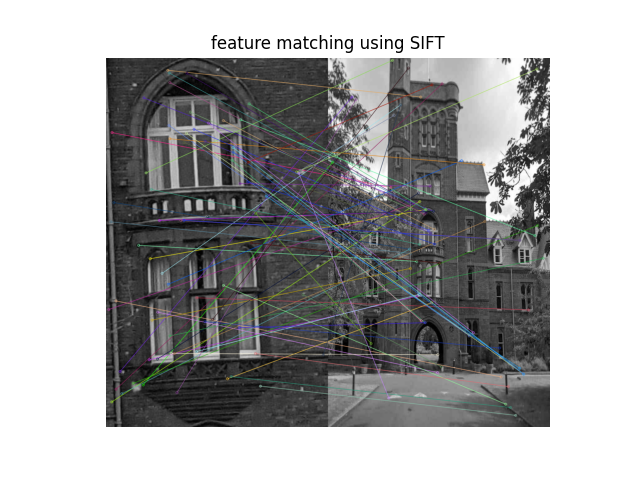

(-0.5, 1199.5, 999.5, -0.5)

In [15]:
img1 = cv2.imread('images/door2.jpg',cv2.IMREAD_GRAYSCALE) # trainImage
img1 = cv2.resize(img1, (600,))
img2 = cv2.imread('images/girton2.jpg',cv2.IMREAD_GRAYSCALE)# queryImage
img2 = cv2.resize(img2, (600, 1000))
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax.set_title('feature matching using SIFT')
ax.axis('off')

## Manipulating 3D coords

In this example, you can see how changing the extrinisc and intrisic (focal length) parameters of the camera causes a change in the image. This will hopefully give you an idea of how we can manipulate images to change the position the picture was taken from and how it is simple and pure mathematics! For more resources on this, check out: https://learnopencv.com/geometry-of-image-formation/. Image credits: https://unsplash.com/photos/wqQ4NNG_J28

In [ ]:
f = 500
rotXval = 90
rotYval = 90
rotZval = 90
distXval = 500
distYval = 500
distZval = 500

def onFchange(change):
    global f
    f = change['new']
def onRotXChange(change):
    global rotXval
    rotXval = change['new']
def onRotYChange(change):
    global rotYval
    rotYval = change['new']
def onRotZChange(change):
    global rotZval
    rotZval = change['new']
def onDistXChange(change):
    global distXval
    distXval = change['new']
def onDistYChange(change):
    global distYval
    distYval = change['new']
def onDistZChange(change):
    global distZval
    distZval = change['new']



def process_image():
    # Read input image, and create output image
    src = cv2.imread("images/tracks.jpg")
    src = cv2.resize(src, (640, 480))
    dst = np.zeros_like(src)
    h, w = src.shape[:2]
    fig, ax = plt.subplots()
    ax.set_title("original image")
    ax.axis('off')
    ax.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
    plt.show()
    
    
    fig, ax = plt.subplots()
    ax.axis('off')
    
    def update_image(f_val, rotX_val, rotY_val, rotZ_val, distX_val, distY_val, distZ_val):

        if f_val <= 0:
            f_val = 1

        rotX = (rotX_val - 90) * np.pi / 180
        rotY = (rotY_val - 90) * np.pi / 180
        rotZ = (rotZ_val - 90) * np.pi / 180
        distX = distX_val - 500
        distY = distY_val - 500
        distZ = distZ_val - 500

        # Camera intrinsic matrix
        K = np.array([[f_val, 0, w/2, 0],
                      [0, f_val, h/2, 0],
                      [0, 0, 1, 0]])

        # K inverse
        Kinv = np.zeros((4, 3))
        Kinv[:3, :3] = np.linalg.inv(K[:3, :3]) * f_val
        Kinv[-1, :] = [0, 0, 1]

        # Rotation matrices around the X, Y, Z axis
        RX = np.array([[1, 0, 0, 0],
                       [0, np.cos(rotX), -np.sin(rotX), 0],
                       [0, np.sin(rotX), np.cos(rotX), 0],
                       [0, 0, 0, 1]])

        RY = np.array([[np.cos(rotY), 0, np.sin(rotY), 0],
                       [0, 1, 0, 0],
                       [-np.sin(rotY), 0, np.cos(rotY), 0],
                       [0, 0, 0, 1]])

        RZ = np.array([[np.cos(rotZ), -np.sin(rotZ), 0, 0],
                       [np.sin(rotZ), np.cos(rotZ), 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1]])

        # Composed rotation matrix with (RX, RY, RZ)
        R = np.linalg.multi_dot([RX, RY, RZ])

        # Translation matrix
        T = np.array([[1, 0, 0, distX],
                      [0, 1, 0, distY],
                      [0, 0, 1, distZ],
                      [0, 0, 0, 1]])

        # Overall homography matrix
        H = np.linalg.multi_dot([K, R, T, Kinv])

        # Apply matrix transformation
        cv2.warpPerspective(src, H, (w, h), dst, cv2.INTER_CUBIC)
        print(R)
        # Display the transformed image using Matplotlib
        ax.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
        plt.show()

    # Create user interface with sliders that will allow modifying the parameters of the transformation

    f_val = widgets.IntSlider(min=0, max=1000, value=f, description='f', continuous_update=False)
    rotx_val = widgets.IntSlider(min=0, max=180, value=rotXval, description='Rotation X', continuous_update=False)
    roty_val = widgets.IntSlider(min=0, max=180, value=rotYval, description='Rotation Y', continuous_update=False)
    rotz_val = widgets.IntSlider(min=0, max=180, value=rotZval, description='Rotation Z', continuous_update=False)
    dist_xval = widgets.IntSlider(min=-500, max=500, value=distXval, description='Distance X', continuous_update=False)
    dist_yval = widgets.IntSlider(min=-500, max=500, value=distYval, description='Distance Y', continuous_update=False)
    dist_zval = widgets.IntSlider(min=-500, max=500, value=distZval, description='Distance Z', continuous_update=False)
    
    interact_widget = widgets.interactive(update_image, f_val = f_val, rotX_val = rotx_val, rotY_val = roty_val, rotZ_val = rotz_val, distX_val = dist_xval, distY_val =  dist_yval, distZ_val = dist_zval)
    display(interact_widget)

# Call the process_image function
process_image()


## Depth maps

This section shows how to create a rudimentatry depth map. It is based off https://docs.opencv.org/3.4/dd/d53/tutorial_py_depthmap.html. Try changing the block size and disparities to see how the result changes! For a more in depth look into how stero depth maps work and epipolar geometry check out the previous link and: https://docs.opencv.org/3.4/da/de9/tutorial_py_epipolar_geometry.html


In [ ]:
BlockSize = 7 # Default is 7
Number_of_disparities = 16 # Default is 16


imgL = cv2.imread('images/sterol.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('images/steror.png', cv2.IMREAD_GRAYSCALE)
stereo = cv2.StereoBM_create(numDisparities=Number_of_disparities, blockSize=BlockSize)
disparity = stereo.compute(imgL,imgR)

fig, axs = plt.subplots(1, 3)
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
axs[0].imshow(imgL, "gray")
axs[0].set_title("Left Image")
axs[1].imshow(imgR, "gray")
axs[1].set_title("Right Image")
axs[2].set_title("Depth Map")

ax.imshow(disparity, "gray")
plt.show()